In [1]:
import time
import os

import pandas as pd
import requests
import csv

# Get Listing Status

In [8]:
# get listing status
api_key = open("key", "r").read()
url = 'https://www.alphavantage.co/query'

In [9]:

params = {
    "apikey": api_key,
    "function": "LISTING_STATUS",
    "outputsize": "full",
    "datatype": "csv"
}

response = requests.get(url, params=params)

response = response.content.decode('utf-8')
response = response.splitlines()
response = [line.split(',') for line in response]
# save to csv
with open('data/listing_status.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in response:
        writer.writerow(row)

In [11]:
df_symbols = pd.read_csv('data/listing_status.csv', delimiter=',')
# drop rows where name is NaN
df_symbols = df_symbols.dropna(subset=['name'])
# save to csv
df_symbols.to_csv('data/listing_status.csv', index=True)

# Methods to get Time Series data

In [2]:
error_msg = b'{\n    "Note": "Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 100 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency."\n}'
max_error = b'{\n    "Information": "Thank you for using Alpha Vantage! You have reached the 100 requests/day limit for your free API key. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits."\n}'

In [0]:
def get_response(api_key, function, symbol):
    params = {
        "apikey": api_key,
        "function": function,
        "symbol": symbol,
        "outputsize": "full",
        "datatype": "csv"
    }
    response = requests.get(url, params=params)
    if response.content == error_msg:
        print("Too many calls, sleep for 60 seconds")
        time.sleep(61)
        return get_response(api_key, function, symbol)
    if response.content == max_error:
        print("Max calls reached")
        return None
    return response

In [3]:
def modify_output(symbol, response):
    data = response.content.decode('utf-8')
    data = data.splitlines()
    # add symbol at the beginning of each line
    data = [symbol + "," + line for line in data]
    return data[1:]


def save_csv(path, data):
    with open(path, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for row in data:
            writer.writerow(row.split(','))


def timestamps(api_key, function, symbol, path):
    response = get_response(api_key, function, symbol)
    if response is None:
        return None
    data = modify_output(symbol, response)
    save_csv(path, data)
    return "success"

# Get Time Series Daily

In [4]:
path = 'data/timestamps.csv'

if not os.path.isfile(path):
    # create file
    with open(path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["symbol", "timestamp", "open", "high", "low", "close", "volume"])
    print("File created")

In [5]:
calls = 100

In [6]:
api_key = open("key", "r").read()
# api_key = open("key_roman", "r").read()
url = 'https://www.alphavantage.co/query'

function = "TIME_SERIES_DAILY"

In [7]:
df_symbols = pd.read_csv('data/listing_status.csv', delimiter=',')
df_symbols = df_symbols[df_symbols['name'].str.contains("MSCI|FTSE")]
symbols = df_symbols["symbol"].unique()
print("Number of symbols: {}".format(len(symbols)))

Number of symbols: 260


In [10]:
df = pd.read_csv('data/timestamps.csv', delimiter=',')  # get all timestamps that are not a time format
done_symbols = df["symbol"].unique()
todo_symbols = [s for s in symbols if s not in done_symbols]
print("Number of symbols to do: {}".format(len(todo_symbols)))
print("Number of symbols done: {}".format(len(done_symbols)))
print("Percentage done: {:.2f}%".format(len(done_symbols) / len(symbols) * 100))

Number of symbols to do: 0
Number of symbols done: 260
Percentage done: 100.00%


In [9]:
for symbol in todo_symbols:
    if calls == 0:
        print("Max calls reached")
        break
    data = timestamps(api_key, function, symbol, path)
    last_symbol = symbol
    if data == "success":
        print("Data for symbol {} saved successfully".format(symbol))
        calls -= 1
    else:
        print("Data for symbol {} not saved".format(symbol))
        break

Data for symbol SCZ saved successfully
Data for symbol SDEM saved successfully
Data for symbol SDG saved successfully
Data for symbol SHE saved successfully
Data for symbol SIZE saved successfully
Too many calls, sleep for 60 seconds
Data for symbol SLVP saved successfully
Data for symbol SMIN saved successfully
Data for symbol SMMV saved successfully
Data for symbol SPGM saved successfully
Data for symbol SUSA saved successfully
Too many calls, sleep for 60 seconds
Data for symbol SUSL saved successfully
Data for symbol TCHI saved successfully
Data for symbol THD saved successfully
Data for symbol TOK saved successfully
Data for symbol TUR saved successfully
Too many calls, sleep for 60 seconds
Data for symbol UAE saved successfully
Data for symbol UBR saved successfully
Data for symbol UEVM saved successfully
Data for symbol UPV saved successfully
Data for symbol URTH saved successfully
Too many calls, sleep for 60 seconds
Data for symbol USCA saved successfully
Data for symbol USCL 

In [71]:
import requests

api_key = open("key", "r").read()
# api_key = open("key_roman", "r").read()
url = 'https://www.alphavantage.co/query'
function = "TIME_SERIES_WEEKLY_ADJUSTED"
symbol = "URTH"
params = {
    "apikey": api_key,
    "function": function,
    "symbol": symbol,
    "datatype": "csv"
}

response = requests.get(url, params=params)
response = response.content.decode('utf-8')


In [77]:
rows = response.splitlines()
rows = [row.split(',') for row in rows]
rows

[['timestamp',
  'open',
  'high',
  'low',
  'close',
  'adjusted close',
  'volume',
  'dividend amount'],
 ['2023-10-17',
  '121.2100',
  '122.3300',
  '120.8900',
  '121.8300',
  '121.8300',
  '317710',
  '0.0000'],
 ['2023-10-13',
  '119.6400',
  '122.5300',
  '119.5700',
  '120.6800',
  '120.6800',
  '707569',
  '0.0000'],
 ['2023-10-06',
  '119.7800',
  '120.6500',
  '117.5200',
  '120.2500',
  '120.2500',
  '965545',
  '0.0000'],
 ['2023-09-29',
  '120.7100',
  '121.5300',
  '118.6800',
  '120.1700',
  '120.1700',
  '972211',
  '0.0000'],
 ['2023-09-22',
  '124.4800',
  '124.9300',
  '121.0900',
  '121.1700',
  '121.1700',
  '822172',
  '0.0000'],
 ['2023-09-15',
  '124.9000',
  '125.8700',
  '124.2150',
  '124.6200',
  '124.6200',
  '516445',
  '0.0000'],
 ['2023-09-08',
  '125.7900',
  '125.7900',
  '123.5000',
  '124.1200',
  '124.1200',
  '612552',
  '0.0000'],
 ['2023-09-01',
  '123.4700',
  '126.6097',
  '123.1900',
  '125.9100',
  '125.9100',
  '1472979',
  '0.0000'],
 [

In [78]:
with open(f'data/{symbol}_{function}.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#open time series daily
df = pd.read_csv(f'data/{symbol}_{function}.csv', delimiter=',')
df

ParserError: Error tokenizing data. C error: Expected 69 fields in line 9, saw 70


In [55]:
# format timestamp as date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df

,symbol,timestamp,open,high,low,close,volume
0,AAXJ,2023-10-14,63.6000,64.2000,63.4780,64.0800,290766
1,AAXJ,2023-10-13,63.9200,64.1350,63.6300,63.7800,551151
2,AAXJ,2023-10-12,64.8300,64.8300,63.9200,64.0300,527834
3,AAXJ,2023-10-11,64.6900,64.8650,64.4550,64.6800,584065
4,AAXJ,2023-10-10,63.8100,64.3450,63.6700,64.2500,344918
...,...,...,...,...,...,...,...
731318,YXI,2010-03-24,50.1800,50.5600,50.1799,50.2100,20700
731319,YXI,2010-03-23,49.9986,49.9986,49.9986,49.9986,200
731320,YXI,2010-03-22,49.7200,49.7200,49.7199,49.7200,1400
731321,YXI,2010-03-19,49.3800,49.9300,49.3800,49.8900,700


In [63]:
sub_df = df[df['symbol'] == 'URTH'].sort_values(by=['timestamp'])
sub_df

,symbol,timestamp,open,high,low,close,volume
679698,URTH,2012-01-12,50.30,50.30,50.30,50.30,100
679697,URTH,2012-01-13,50.30,50.30,50.30,50.30,0
679696,URTH,2012-01-17,50.30,50.30,50.30,50.30,0
679695,URTH,2012-01-18,50.30,50.30,50.30,50.30,0
679694,URTH,2012-01-19,51.78,51.78,51.78,51.78,300
...,...,...,...,...,...,...,...
676744,URTH,2023-10-10,121.40,122.45,121.25,121.78,142007
676743,URTH,2023-10-11,122.25,122.39,121.50,122.32,152999
676742,URTH,2023-10-12,122.53,122.53,120.83,121.38,157778
676741,URTH,2023-10-13,121.68,121.95,120.28,120.68,175355


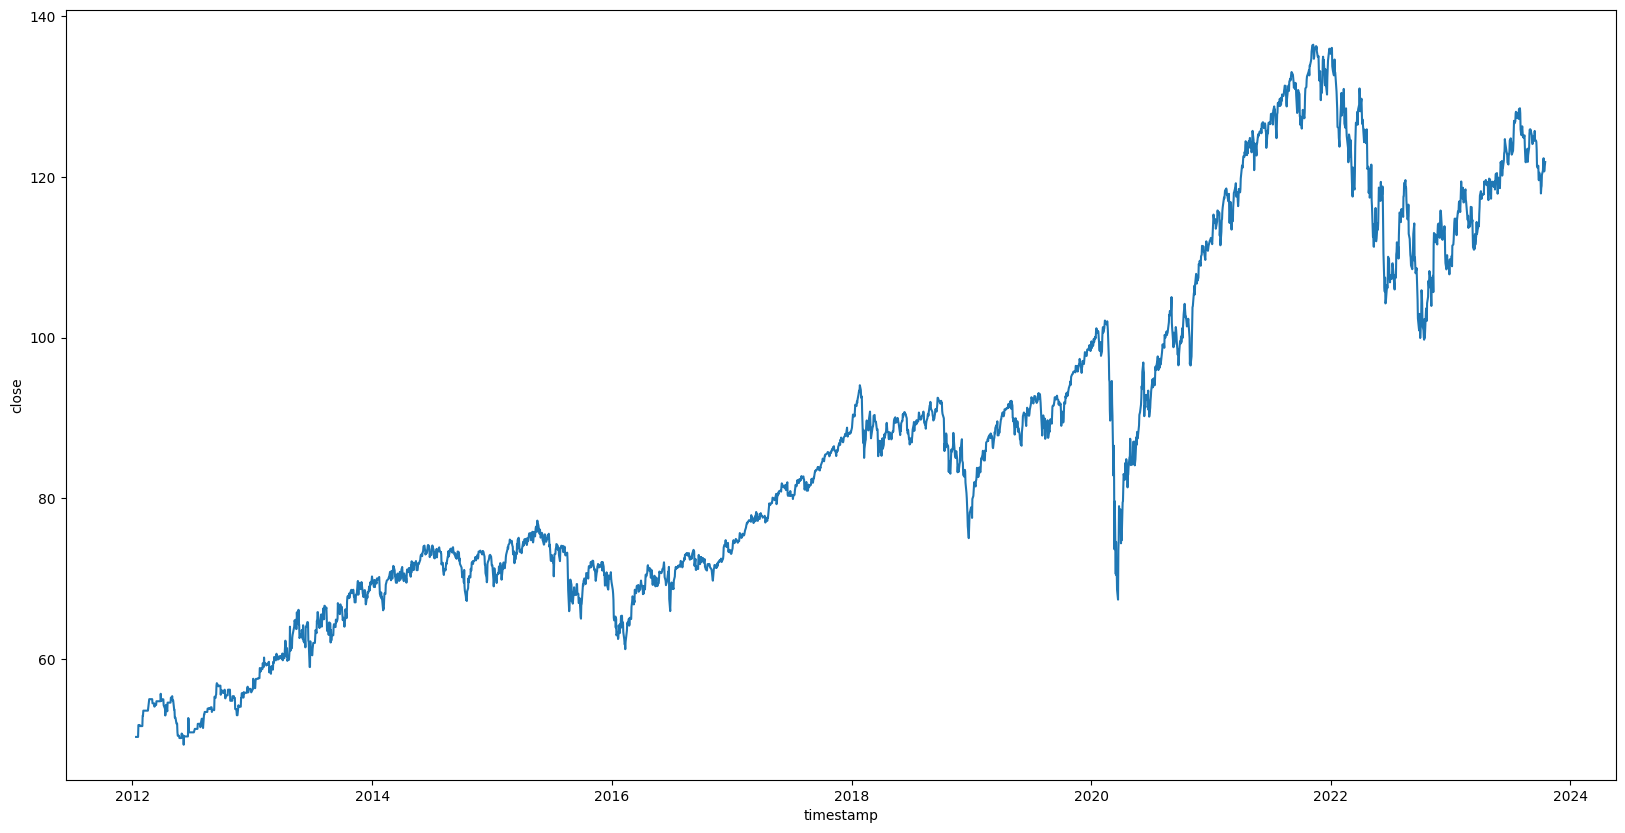

In [66]:

plt.figure(figsize=(20, 10))
sns.lineplot(x='timestamp', y='close', data=sub_df)
plt.show()

----
Wow

In [51]:
error_msg = b'{\n    "Note": "Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 100 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency."\n}'
max_error = b'{\n    "Information": "Thank you for using Alpha Vantage! You have reached the 25 requests/day limit for your free API key. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits."\n}'


In [52]:
def get_response(api_key, function, keyword):
    params = {
        "apikey": api_key,
        "function": function,
        "keywords": keyword,
    }
    response = requests.get(url, params=params)
    if response.content == error_msg:
        print("Too many calls, sleep for 60 seconds")
        time.sleep(61)
        return get_response(api_key, function, symbol)
    if response.content == max_error:
        print("Max calls reached")
        return None
    return response

In [53]:
import json


def modify_output(response):
    data = response.content.decode('utf-8')
    data = json.loads(data)
    # only keep the first result
    data = data["bestMatches"][0]
    return data


def save_csv(path, data):
    with open(path, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(data.values())


def symbol_search(api_key, function, symbol, path):
    response = get_response(api_key, function, symbol)
    print(response.content)
    if response is None:
        return None
    data = modify_output(response)
    save_csv(path, data)
    return "success"

In [49]:
path = 'data/symbol_search.csv'
if not os.path.isfile(path):
    # create file
    with open(path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(
            ["symbol", "name", "type", "region", "marketOpen", "marketClose", "timezone", "currency", "matchScore"])
    print("File created")

In [57]:
calls = 100
api_key = open("key_roman", "r").read()
# api_key = open("key_roman", "r").read()
url = 'https://www.alphavantage.co/query'

function = "SYMBOL_SEARCH"

df_symbols = pd.read_csv('data/listing_status.csv', delimiter=',')
df_symbols = df_symbols[df_symbols['name'].str.contains("MSCI|FTSE")]
symbols = df_symbols["symbol"].unique()
print("Number of symbols: {}".format(len(symbols)))

df = pd.read_csv('data/symbol_search.csv', delimiter=',')  # get all timestamps that are not a time format
done_symbols = df["symbol"].unique()
todo_symbols = [s for s in symbols if s not in done_symbols]
print("Number of symbols to do: {}".format(len(todo_symbols)))
print("Number of symbols done: {}".format(len(done_symbols)))
print("Percentage done: {:.2f}%".format(len(done_symbols) / len(symbols) * 100))

for symbol in todo_symbols:
    if calls == 0:
        print("Max calls reached")
        break
    data = symbol_search(api_key, function, symbol, path)
    last_symbol = symbol
    if data == "success":
        print("Data for symbol {} saved successfully".format(symbol))
        calls -= 1
    else:
        print("Data for symbol {} not saved".format(symbol))
        break

Number of symbols: 262
Number of symbols to do: 242
Number of symbols done: 20
Percentage done: 7.63%
b'{\n    "Information": "Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits."\n}'


KeyError: 'bestMatches'

In [42]:
data

'success'

In [66]:
df_symbols = pd.read_csv('data/listing_status.csv', delimiter=';')
df_symbols = df_symbols[df_symbols['name'].str.contains("MSCI|FTSE")]
 
# save to csv
df_symbols.to_csv('data/listing_status_etf.csv', index=True, sep=';')